In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('transaction_data.csv')

In [27]:
df.columns

Index(['Transaction ID', 'Sender Account ID', 'Receiver Account ID',
       'Transaction Amount', 'Transaction Type', 'Timestamp',
       'Transaction Status', 'Fraud Flag', 'Geolocation (Latitude/Longitude)',
       'Device Used'],
      dtype='object')

In [26]:
df.drop_duplicates() # no duplicates

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",Desktop
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",Mobile
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",Mobile
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",Mobile
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",Mobile
...,...,...,...,...,...,...,...,...,...,...
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,1/17/2025 10:49,Success,False,"35.6895 N, -118.2437 W",Mobile
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,1/17/2025 11:00,Failed,True,"55.7558 N, 37.6173 W",Mobile
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,1/17/2025 10:54,Success,False,"34.0522 N, 139.6917 W",Desktop
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,1/17/2025 10:59,Success,True,"51.5074 N, 139.6917 W",Mobile


In [24]:
df.describe()

,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


In [4]:
df.isna().sum()

Transaction ID                      0
Sender Account ID                   0
Receiver Account ID                 0
Transaction Amount                  0
Transaction Type                    0
Timestamp                           0
Transaction Status                  0
Fraud Flag                          0
Geolocation (Latitude/Longitude)    0
Device Used                         0
dtype: int64

In [9]:
transactions = df.groupby('Transaction ID')['Transaction Amount'].sum()

In [20]:
transactions = transactions.nlargest(10).reset_index()

In [21]:
transactions

,Transaction ID,Transaction Amount
0,TXN1696527060,1497.76
1,TXN8741905833,1495.01
2,TXN4979176158,1494.20
3,TXN7486103501,1494.03
4,TXN4433757533,1494.01
5,TXN8552007460,1493.86
6,TXN9255711120,1493.27
7,TXN7347670619,1488.93
8,TXN4930471112,1485.37
9,TXN9960780796,1485.22


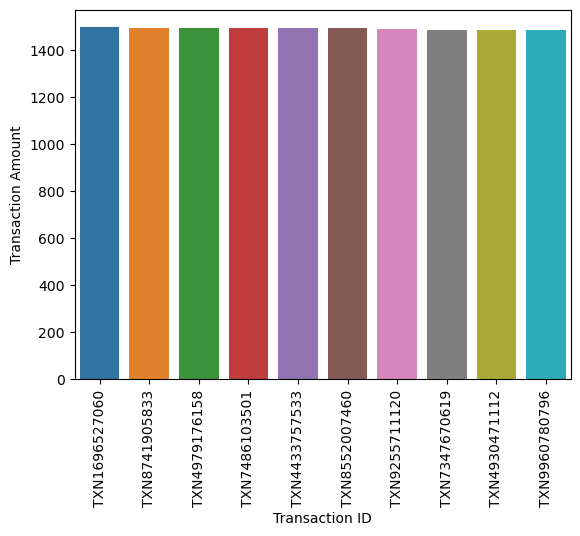

In [23]:
sns.barplot(x ='Transaction ID',y = 'Transaction Amount',data = transactions)
plt.xticks(rotation = 90)
plt.show()

In [54]:
type_no = df.groupby('Transaction Type')['Transaction Type'].count()

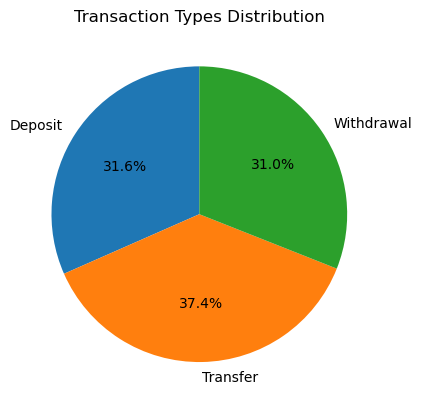

In [58]:
plt.pie(type_no.values, labels=type_no.index, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Types Distribution')
plt.show()

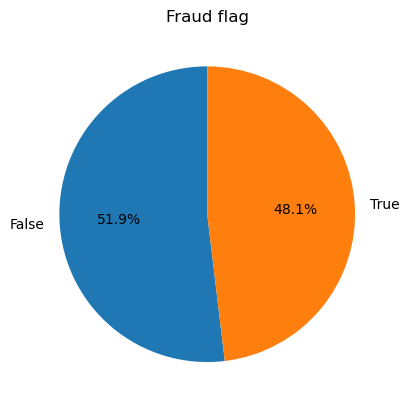

In [66]:
fraud =df.groupby('Fraud Flag')['Fraud Flag'].count()
plt.pie(fraud.values, labels=type_no.index, autopct='%1.1f%%', startangle=90)
plt.title('Fraud flag')
plt.show()